<a href="https://colab.research.google.com/github/kylemcq13/Projects/blob/master/17_6_Naive_Bayes_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 17.6 Naive Bayes Model

In [0]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
amazon = pd.read_csv('amazon_cells_labelled.txt', delimiter = '\t', header=None)
amazon.columns = ['review', 'score']

In [0]:
#create positive keywords list and add to the dataframe

positive = ['great', 'good', 'love', 'like', 'nice', 'beautiful', 'happy', 'awesome', 'easy', 'helpful', 'useful', 'simple',
            'excellent', 'recommend', 'well', 'works', 'best', 'nice', 'must', 'price']

for p in positive:
    
    amazon[str(p)] = amazon.review.str.contains(
        str(p),
        case=False
    )

In [0]:
amazon['review'] = amazon['review'].str.lower()
amazon.head(100)

,review,score,great,good,love,like,nice,beautiful,happy,awesome,...,helpful,useful,simple,excellent,recommend,well,works,best,must,price
0,so there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"good case, excellent value.",1,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,great for the jawbone.,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,the mic is great.,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,i have to jiggle the plug to get it to line up...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,if you have several dozen or several hundred c...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,if you are razr owner...you must have this!,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
8,"needless to say, i wasted my money.",0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,what a waste of money and time!.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


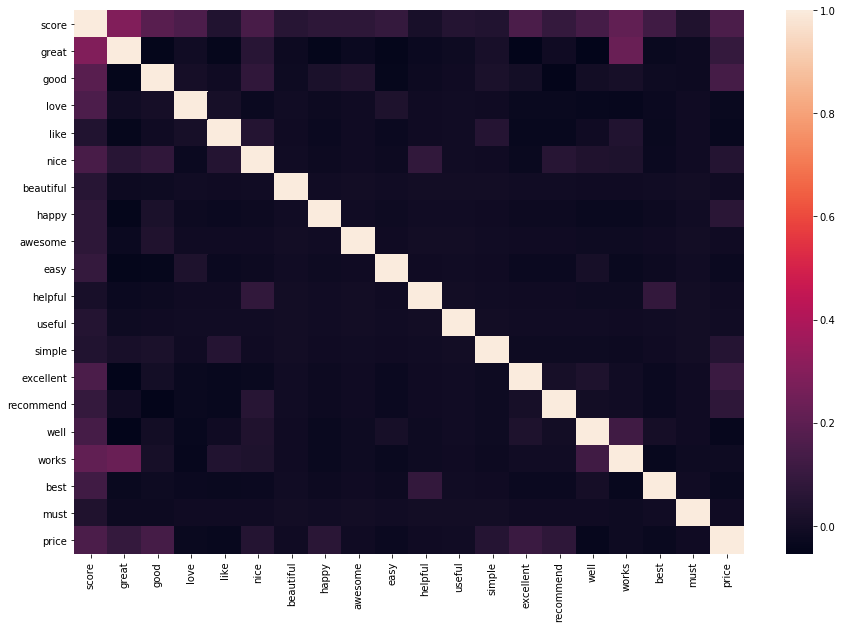

In [0]:
# create a heatmap to view correlation
plt.figure(figsize=(15,10))
sns.heatmap(amazon.corr())

In [0]:
amazon['score'] = (amazon['score'] == 1)

In [0]:
amazon.head()

,review,score,great,good,love,like,nice,beautiful,happy,awesome,...,helpful,useful,simple,excellent,recommend,well,works,best,must,price
0,so there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"good case, excellent value.",1,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,great for the jawbone.,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,the mic is great.,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [0]:
data = amazon[positive]
target = amazon['score']

In [0]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# instantiate our model and store it in a new variable
bnb = BernoulliNB()

# fit our model to the data
bnb.fit(data, target)

# classify, storing the result in a new variable
y_pred = bnb.predict(data)

# display our results
print('Number of mislabeled points out of a total {} points: {}'.format(
    data.shape[0],
    (target != y_pred).sum()
    ))

Number of mislabeled points out of a total 1000 points: 224


Roughly 78% success rate... not bad. 

# Negative Reviews

In [0]:
amazon = pd.read_csv('amazon_cells_labelled.txt', delimiter = '\t', header=None)
amazon.columns = ['review', 'score']

negative = ['horrible', 'bad', 'worst', 'not', 'disappointed', 'sucks', 'terrible', 'awful', 'cheap', 'poor', 'junk', 'waste',
           'useless', 'beware']

for n in negative:
    
    amazon[str(n)] = amazon.review.str.contains(
        str(n),
        case=False
    )

In [0]:
amazon['review'] = amazon['review'].str.lower()

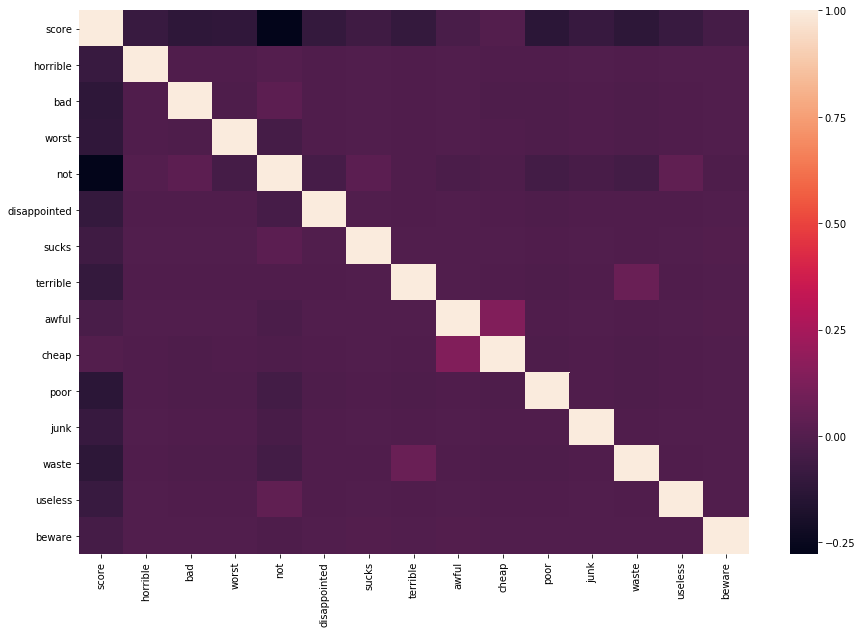

In [0]:
plt.figure(figsize=(15,10))
sns.heatmap(amazon.corr())

In [0]:
amazon['score'] = (amazon['score'] == 0)

In [0]:
data = amazon[negative]
target = amazon['score']

In [0]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# instantiate our model and store it in a new variable
bnb = BernoulliNB()

# fit our model to the data
bnb.fit(data, target)

# classify, storing the result in a new variable
y_pred = bnb.predict(data)

# display our results
print('Number of mislabeled points out of a total {} points: {}'.format(
    data.shape[0],
    (target != y_pred).sum()
    ))

Number of mislabeled points out of a total 1000 points: 306


Roughly 70% success rate, not great, not horrible.

# Let's try our model on IMDB reviews

In [0]:
imdb = pd.read_csv('imdb_labelled.txt', delimiter = '\t', header=None)
imdb.columns = ['review', 'score']

In [0]:
imdb['score'] = (imdb['score'] == 1)

In [0]:
imdb['review'] = imdb['review'].str.lower()

In [0]:
for p in positive:
    
    imdb[str(p)] = imdb.review.str.contains(
        ' ' + str(p) + ' ',
        case=False
    )

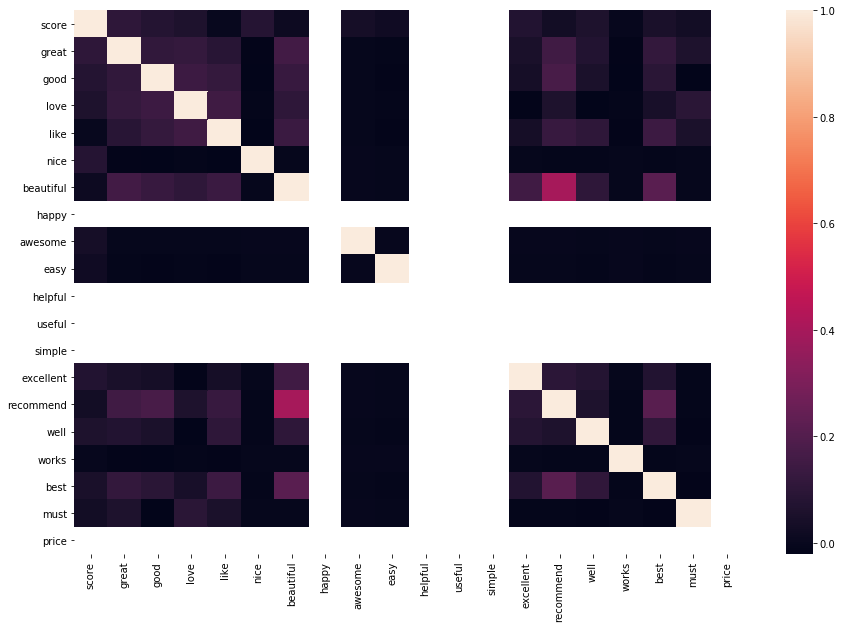

In [0]:
plt.figure(figsize=(15,10))
sns.heatmap(imdb.corr())

In [0]:
data = imdb[positive]
target = imdb['score']

In [0]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# instantiate our model and store it in a new variable
bnb = BernoulliNB()

# fit our model to the data
bnb.fit(data, target)

# classify, storing the result in a new variable
y_pred = bnb.predict(data)

# display our results
print('Number of mislabeled points out of a total {} points: {}'.format(
    data.shape[0],
    (target != y_pred).sum()
    ))

Number of mislabeled points out of a total 748 points: 320


With a 57% success rate, we can see that the postive keywords from the Amazon reviews don't quite match up with positive keywords in movie reviews. It would make sense that the keywords don't match up between industries but it would be interesting to compare IMDB reviews with Amazon Prime Video reviews. In order for the IMDB model success rate to become more acceptable, the keywords would need to be changed. As we can see above, there are some words that cross over but some more are needed. 